In [1]:
#################################################################################################################
# this script plots observation datasets with 80% model agreement to sign of change hatched. 
#
# By: Kwesi A. Quagraine (2019)
# notes: a mistake in labeling causes 4 & 8 to swap so it has been saved alternatively; as in cond.4-->file 8.png
#################################################################################################################

#For working with arrays: NumPy
import numpy as np
# For loading netCDF data
import netCDF4
# For calculating linear regression
import scipy.stats
# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
plt.rcParams['font.size'] = 12
plt.rcParams['hatch.linewidth'] = 0.1
plt.rc('font', family='arial')

# Datetime libraries for converting dates
from datetime import datetime, timedelta 

import xarray as xr
# for creating maps
from mpl_toolkits.basemap import Basemap

# Plots in iPython Notebook, not a pop-up window
%matplotlib inline

#high resolution plots
%config InlineBackend.figure_format = 'retina' 

import warnings
warnings.filterwarnings("ignore")

import sys

#### Observation as spatial plot with 80% model agreement to sign of change hatched (Precip)

CPU times: user 5min 48s, sys: 744 ms, total: 5min 49s
Wall time: 5min 49s


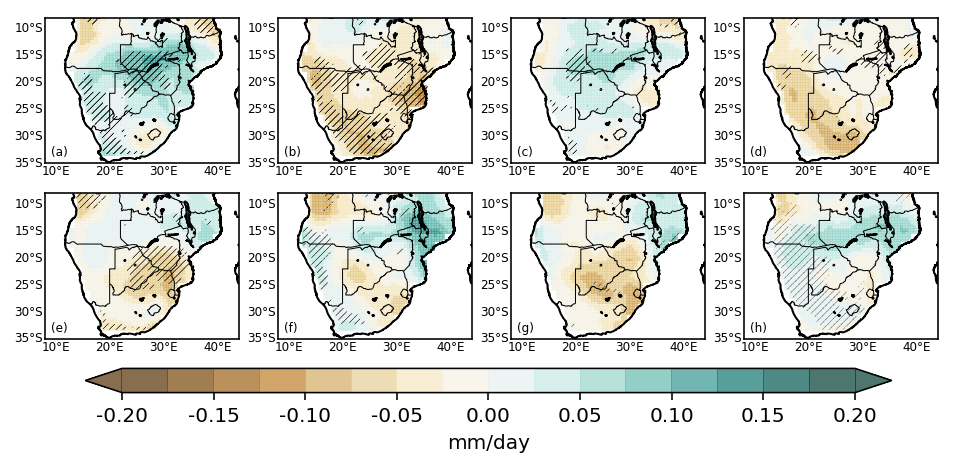

In [5]:
%%time
inst = 'chirps'
vart = 'pr'
exp = 'rcp85'
period = '198001-201312'
var ='anom'
obs2 = {}
pv = {}
pvar='anom_agree'

anom_path = '/home/kwesi/terra/research/paper2/precip'

obs = {1: '1',2:'2',3:'7',4:'4',
       5:'5', 6:'6',7:'3', 8:'8'}

con = {1:'PC1>+1 PC2&PC3<-1 STD', 2:'PC2>+1 PC1&PC3<-1 STD', 3:'PC3>+1 PC1&PC2<-1 STD', 4:'PC1&2&3>+1 STD', 
       5:'PC1<-1 PC2&PC3>+1 STD', 6:'PC2<-1 PC1&PC3>+1 STD', 7:'PC3<-1 PC2&PC1>+1 STD', 8:'PC1&2&3<-1 STD'}

p_models = {1:'cond_1',2:'cond_2',3:'cond_7',4:'cond_4',  
          5:'cond_5',6:'cond_6', 7:'cond_3',8:'cond_8'}

lab = {1: '(a)',2:'(b)',3:'(c)',4:'(d)',
       5:'(e)', 6:'(f)',7:'(g)', 8:'(h)'}

percent = {1: '3.44%',2:'3.94%',3:'3.69%',4:'4.67%',
       5:'3.69%', 6:'4.19%',7:'3.94%', 8:'4.43%'}

D_id_color = [{'1':u'turquoise', '2': u'darkviolet', '3': u'darkviolet'}, {'2':u'turquoise', '1': u'darkviolet', '3': u'darkviolet'}, {'3':u'turquoise', '1': u'darkviolet', '2': u'darkviolet'},
       {'1':u'turquoise', '2': u'turquoise', '3': u'turquoise'}, {'2':u'turquoise', '1': u'darkviolet', '3': u'turquoise'}, {'1':u'turquoise', '2': u'darkviolet', '3': u'turquoise'},
       {'1':u'turquoise', '2': u'turquoise', '3': u'darkviolet'}, {'1':u'darkviolet', '2': u'darkviolet', '3': u'darkviolet'}]

precip_dsets=[]
for i in obs:
    anom_file = 'cond_chirps_mean.%s.masked.nc' %obs[i]
    
    obs2[i] = precip_dsets+[netCDF4.Dataset(anom_path + '/' + anom_file)]
    #print(obs2)
#cond_1_merge_precip_tm_agree_lonlat.nc

modagree_dsets=[]
for j in p_models:
    modagree_file = '%s_merge_precip_tm_agree_lonlat_masked.nc' %p_models[j]
    
    pv[j] = modagree_dsets+[netCDF4.Dataset(anom_path + '/' + modagree_file)]
    #print(pv)


mmin = -0.2
mmax = 0.2
mlabel = 'mm/day'

    
#plot_title = 'PC1 > +1 PC2 & PC3 < -1 STD  ' #+ '\n GCMs ' + period
fig=plt.figure(figsize=(8,7))
                         
count = 1
for i in obs2: #sorted(models, key=str.lower):
    ax=fig.add_subplot(2,4,count)
    model = obs2[i][0]
    
    
    #ax.set_title(con[i],fontsize=7)
    ax.text(0.03,0.05, lab[i],transform=ax.transAxes,fontsize=6)
    # The following two lines generate custom fake lines that will be used as legend entries:
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in D_id_color.values()[i]]
    plt.legend(markers, D_id_color.keys()[i], numpoints=1)
    
    #plt.plot(4.0, 0.5, marker='o', markersize=3, color="blue")
    #plt.plot(4.5, 0.5, marker='o', markersize=3, color="red")
    #plt.plot(5.0, 0.5, marker='o', markersize=3, color="red")
    #ax.text(0.76,0.05, percent[i],transform=ax.transAxes,fontsize=7)
    
    #ax.text(0.4, 0.72,'SRR',transform=ax.transAxes,fontsize=8,color='red',fontweight='bold')
                        #((bottom,left coord),width,height)
    #rect = patches.Rectangle((0.25,0.2),0.3,0.5,linewidth=1,edgecolor='r',facecolor='none')
    #ax.text(0.25, 0.1, 'WRR',transform=ax.transAxes, fontsize=4,color='red',fontweight='bold')
    
    ax = Basemap(projection='cyl',resolution='i',lat_0=20,lon_0=-25,
                     llcrnrlat=-35,urcrnrlat=-8,
                     llcrnrlon=8,urcrnrlon=44)
    
    # draw parallels and meridian on map
    ax.drawparallels(np.arange(-90.,91.,5),labels=[True,False,False,False], linewidth = 0.0,fontsize = 6)
    ax.drawmeridians(np.arange(-180.,181.,10),labels=[False,False,False,True], linewidth = 0.0,fontsize = 6)
    
    # mark geographic features
    ax.drawcountries()
    ax.drawcoastlines()
    #ax.title(str(m))
    
    # get coordinates of data
    lons = model.variables['lon'][:]
    lats = model.variables['lat'][:]
    lons,lats=np.meshgrid(lons,lats)
    
        
    # read trend data
    node = model.variables[var][0,:,:]
    
    # overlay trend data
    #handel_mesh = ax.contour(lons,lats,node,n_levels=7,cmap='BrBG',extend='both',vmin=mmin,vmax=mmax)
    bounds = np.linspace(-0.2, 0.2, 17)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    handel_mesh = ax.pcolormesh(lons,lats,node,shading='flat',latlon=True,
                              alpha=0.7,norm=norm,cmap='BrBG',vmin=mmin,vmax=mmax)
  
    a = 1
    for j in pv:
        ax=fig.add_subplot(2,4,a)
        pvr = pv[j][0]
        baselons = pvr.variables['lon'][:]
        baselats = pvr.variables['lat'][:]
        alons, alats = np.meshgrid(baselons,baselats)
        agree = pvr.variables[pvar][:,:]
        agreement =np.ma.masked_where(agree<=80,agree) #mask areas of NO interest..in this case model agreement LT 80
        
        ax.pcolor(alons,alats, agreement, hatch='///////',alpha=0) # #hatch areas of interest where 80% and above models agree
        a=a+1
        
    count = count + 1

    
# add legend
#                  ''' left,bottom,width,height'''
cbar_ax = fig.add_axes([0.16,0.29,0.7,0.024])
#([0.16,0.9,1.4,0.025])

cbar = fig.colorbar(handel_mesh,format='%.2f',cax=cbar_ax,orientation='horizontal',label='mm/day',pad = 0.55,extend='both')

plt.subplots_adjust(wspace=0.2, hspace=-0.7)
    
image_name = inst + '_' + vart + '_' + 'hist_' + exp + '_agree_new_2a' + '.png'   
fig.savefig('/home/kwesi/terra/research/paper2/plots/' + image_name, dpi=400, bbox_inches='tight')
    
#fig.clf()

#### Observation as spatial plot with 80% model agreement to sign of change hatched (Temperature)

CPU times: user 24min 3s, sys: 760 ms, total: 24min 4s
Wall time: 24min 5s


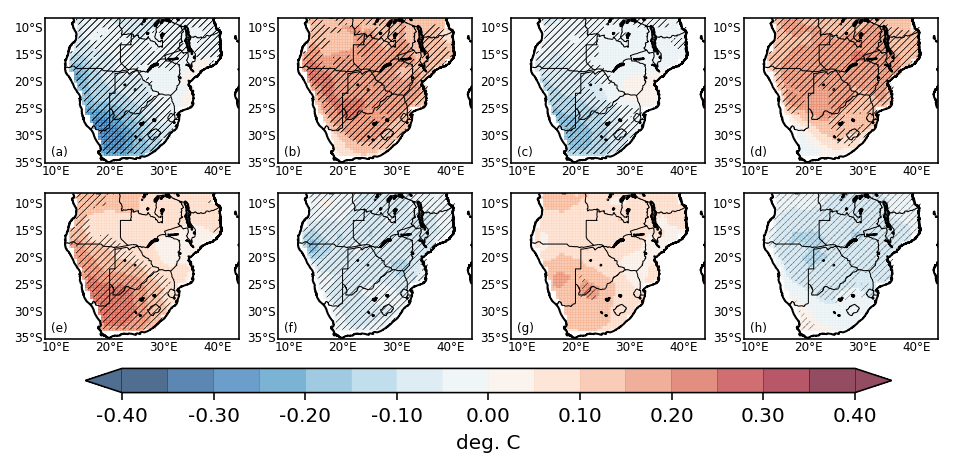

In [2]:
%%time
inst = 'cru'
vart = 'temp'
exp = 'rcp85'
period = '198001-201312'
var ='anom'
obs2 = {}
pv = {}
pvar='anom_agree'

anom_path = '/home/kwesi/terra/research/paper2/temp'

obs = {1: '1',2:'2',3:'3',4:'4',
       5:'5', 6:'6',7:'7', 8:'8'}

con = {1:'PC1>+1 PC2&PC3<-1 STD', 2:'PC2>+1 PC1&PC3<-1 STD', 3:'PC3>+1 PC1&PC2<-1 STD', 4:'PC1&2&3>+1 STD', 
       5:'PC1<-1 PC2&PC3>+1 STD', 6:'PC2<-1 PC1&PC3>+1 STD', 7:'PC3<-1 PC2&PC1>+1 STD', 8:'PC1&2&3<-1 STD'}

p_models = {1:'cond_1',2:'cond_2',3:'cond_7',4:'cond_4',  
          5:'cond_5',6:'cond_6', 7:'cond_3',8:'cond_8'}

lab = {1: '(a)',2:'(b)',3:'(c)',4:'(d)',
       5:'(e)', 6:'(f)',7:'(g)', 8:'(h)'}

percent = {1: '3.44%',2:'3.94%',3:'3.69%',4:'4.67%',
       5:'3.69%', 6:'4.19%',7:'3.94%', 8:'4.43%'}

precip_dsets=[]
for i in obs:
    anom_file = 'cond_cru_mean.%s.masked.nc' %obs[i]
    #print(anom_file)

#tas_Amon_CRU_rcp85_r1i1p1_198001-201312.6_mm.nc

    obs2[i] = precip_dsets+[netCDF4.Dataset(anom_path + '/' + anom_file)]
    #print(obs2)
#cond_1_merge_tas_tm_agree_lonlat_masked.nc

modagree_dsets=[]
for j in p_models:
    modagree_file = '%s_merge_temp_tm_agree_lonlat_masked.nc' %p_models[j]
    
    pv[j] = modagree_dsets+[netCDF4.Dataset(anom_path + '/' + modagree_file)]
    #print(pv)

    
#levels = np.arange(-0.3, 0.3, .05)
mmin = -0.4
mmax = 0.4
mlabel = 'deg. C'

    
#plot_title = 'PC1 > +1 PC2 & PC3 < -1 STD  ' #+ '\n GCMs ' + period
fig=plt.figure(figsize=(8,7))
                         
count = 1
for i in obs2: #sorted(models, key=str.lower):
    ax=fig.add_subplot(2,4,count)
    model = obs2[i][0]
    
    #ax.set_title(con[i],fontsize=7)
    ax.text(0.03,0.05, lab[i],transform=ax.transAxes,fontsize=6)
    #ax.text(0.76,0.05, percent[i],transform=ax.transAxes,fontsize=7)
    
    ax = Basemap(projection='cyl',resolution='i',lat_0=20,lon_0=-25,
                     llcrnrlat=-35,urcrnrlat=-8,
                     llcrnrlon=8,urcrnrlon=44)
    
    # draw parallels and meridian on map
    ax.drawparallels(np.arange(-90.,91.,5),labels=[True,False,False,False], linewidth = 0.0,fontsize = 6)
    ax.drawmeridians(np.arange(-180.,181.,10),labels=[False,False,False,True], linewidth = 0.0,fontsize = 6)
    
    # mark geographic features
    ax.drawcountries()
    ax.drawcoastlines()
    #ax.title(str(m))
    
    # get coordinates of data
    lons = model.variables['lon'][:]
    lats = model.variables['lat'][:]
    lons,lats=np.meshgrid(lons,lats)
    
    
    # read trend data
    node = model.variables[var][0,:,:]
    
    # overlay trend data
    #handel_mesh = ax.contour(lons,lats,node,n_levels=7,cmap='BrBG',extend='both',vmin=mmin,vmax=mmax)
    bounds = np.linspace(-0.4, 0.4, 17)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    handel_mesh = ax.pcolormesh(lons,lats,node,shading='flat',latlon=True,
                              alpha=0.7,norm=norm,cmap='RdBu_r',vmin=mmin,vmax=mmax) #norm=norm,
    a = 1
    for j in pv:
        ax=fig.add_subplot(2,4,a)
        pvr = pv[j][0]
        baselons = pvr.variables['lon'][:]
        baselats = pvr.variables['lat'][:]
        alons, alats = np.meshgrid(baselons,baselats)
        agree = pvr.variables[pvar][:,:]
        agreement =np.ma.masked_where(agree<=80,agree) #mask areas of NO interest..in this case model agreement LT 80
        
        ax.pcolor(alons,alats, agreement, hatch='///////',alpha=0) # #hatch areas of interest where 80% and above models agree
        a=a+1
        
    count = count + 1

    
# add legend
#                  ''' left,bottom,width,height'''
cbar_ax = fig.add_axes([0.16,0.29,0.7,0.024])
#([0.16,0.9,1.4,0.025])

cbar = fig.colorbar(handel_mesh,format='%.2f',cax=cbar_ax,orientation='horizontal',label='deg. C',pad = 0.55,extend='both')

plt.subplots_adjust(wspace=0.2, hspace=-0.7)
    
image_name = inst + '_' + vart + '_' + 'hist_' + exp + '_agree_new_2a' + '.png'   
fig.savefig('/home/kwesi/terra/research/paper2/plots/' + image_name, dpi=400, bbox_inches='tight')
    
#fig.clf()